# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [1]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [2]:
# Haga el cálculo aquí
# Primero, pasamos los grados a mas
x = 3.6e6*0.5
# Luego aplicamos cinematica (t = d/v, con t = ?, d = x, v = 1mas/yr
t = x/1
print(t)
# WOW! 1800000 años...

1800000.0


### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [68]:
path_archivo = '/content/drive/MyDrive/CARPETA PARA EL CSV/ngc5694_pm.csv'

data = pd.read_csv(path_archivo)

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [69]:
# Muestra las columnas aquí (al igual que en la tarea 01, podemos usar el metodo de pandas ".columns")
data.columns

Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')

In [70]:
# Muestra el DataFrame aquí (supongo que se refiere a verlo nomas? esto se puede hacer printeando data o simplemente escribiendo "data" y nada mas !!! (aunque solo escribir "data" me agrada mas porque asi muestra el DataFrame en tablas en vez de solo escrito!!))
data

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
...,...,...,...,...,...
616,616,220.732855,-26.148055,-0.269935,-0.891652
617,617,220.710525,-26.150902,-0.962554,-0.400258
618,618,219.327652,-27.267281,-0.796753,-0.266571
619,619,219.225796,-27.172318,-0.901963,-0.302597


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [12]:
# Para guardar los datos de una columna en una variable, podemos aplicar el metodo de pandas para ver solo una columna, que es: data["columna"].
pmra = data["pmra"]
pmdec = data["pmdec"]

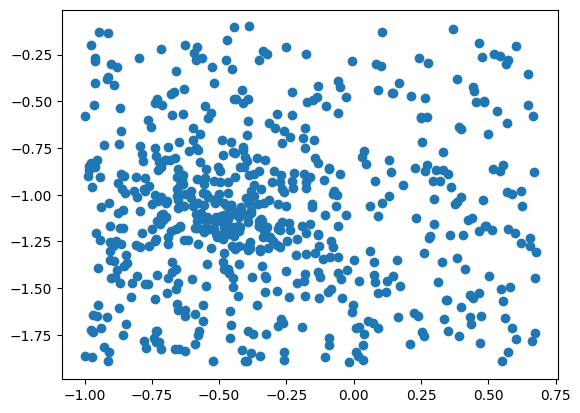

In [15]:
# Haga el gráfico en esta celda
# Para hacer un scatter plot, basta con poner scatter en vez de plot en el meotdo para plottear de mpl ! (porque sino aparecen todos los puntos conectados por lineas lol)
plt.scatter(pmra, pmdec)

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [165]:
# osea ya estaba hecho pero nse si hay que explicarlo de todas maneras asi que aca esta la explicacion del codigo!!:
# para obtener los promedios y desviaciones estandar de las columnas en variables, podemos usar los metodos de pandas ".mean()" y ".std()" para que nos entregue el promedio y desviacion estandar de cada columna asignado a sus variables respectivas. :D
mu_pmra = pmra.mean()
std_pmra = pmra.std()

mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()

-0.3123486977209311
0.43823620785185174
-1.0897362576861138
0.42760876013101434


Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [41]:
from scipy.stats import norm
# Como dice arreglo y comentaron en clase, scipy es "derivado" de numpy, supongo que se refiere a que haga un arreglo de numpy !, que se puede hacer con el metodo ".linspace", luego habria que usar el metodo ".norm" de scipy ! ! !

x_pmra = np.linspace(-1.5, 1, 300)
fx_pmra = norm.pdf(x_pmra, mu_pmra, std_pmra)

x_pmdec = np.linspace(-2.5, 0.5, 300)
fx_pmdec = norm.pdf(x_pmdec, mu_pmdec, std_pmdec)

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

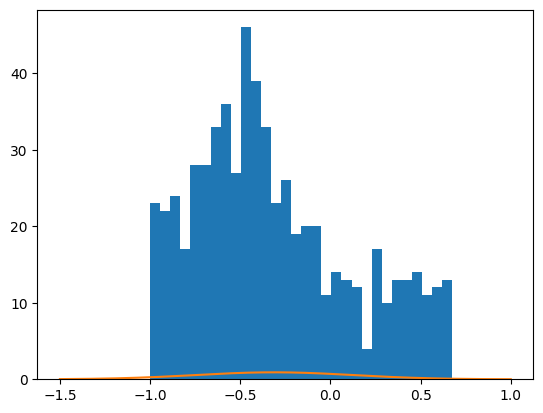

In [50]:
# Encontre que matplotlib tiene un metodo llamado ".hist", con el que se puede hacer este histograma con los datos de pmra para luego compararlo con la gaussiana !!
plt.hist(pmra, bins = 30)
plt.plot(x_pmra, fx_pmra)

Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

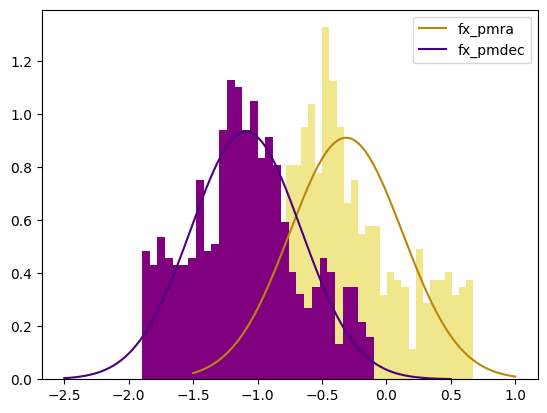

In [60]:
# Hacemos lo de las instrucciones tal cual:
plt.hist(pmra, bins = 30, density = True, color = "khaki")
plt.plot(x_pmra, fx_pmra, color = "darkgoldenrod", label = "fx_pmra")

plt.hist(pmdec, bins = 30, density = True, color = "purple")
plt.plot(x_pmdec, fx_pmdec, color = "indigo", label = "fx_pmdec")
plt.legend()

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

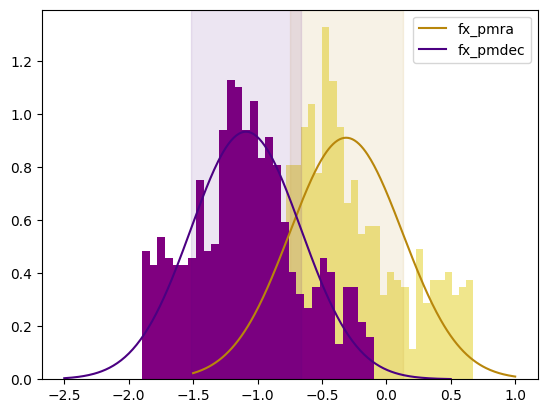

In [65]:
# copypasteamos de la ultima parte y para agregar estas franjas, ponemos en los argumentos de plt.axvspan() los inicios y finales de la franja (mu - sigma, mu + sigma)
plt.hist(pmra, bins = 30, density = True, color = "khaki")
plt.plot(x_pmra, fx_pmra, color = "darkgoldenrod", label = "fx_pmra")
plt.axvspan(mu_pmra - std_pmra, mu_pmra + std_pmra, color = "darkgoldenrod", alpha = 0.1)

plt.hist(pmdec, bins = 30, density = True, color = "purple")
plt.plot(x_pmdec, fx_pmdec, color = "indigo", label = "fx_pmdec")
plt.axvspan(mu_pmdec - std_pmdec, mu_pmdec + std_pmdec, color = "indigo", alpha = 0.1)
plt.legend()

Según las gaussiaas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:** La verdad no se como funcionan las coordenadas celestes, pero segun lo que se puede ver en el grafico, se puede estimar que el cumulo globular se mueve aproximadamente -0.3 ± 0.4 (recta ascendente) y -1 ± 0.4 (declinacion). (no se si iba a esto la pregunta XD).

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [71]:
# Lea y muestre el DataFrame aquí
# Le puse data0 porsiaca pq el de arriba ya se llama data !
path = '/content/drive/MyDrive/CARPETA PARA EL CSV/data_spectra.csv'

data0 = pd.read_csv(path)

data0

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,0.673065,1.048759,1.135927,1.365672,1.205216,0.777480,0.777436,0.723454,...,0.851846,0.828067,0.964739,0.894189,0.734513,0.888324,0.764781,1.213573,0.952286,0.714581
1,1,13894.381791,1.218438,1.384774,0.647763,1.286700,1.223776,1.295540,1.289402,0.979057,...,0.792874,0.792945,1.115174,1.228799,0.755613,0.933819,1.020234,1.121144,1.394790,0.795326
2,2,13895.604780,1.244496,0.775893,1.213005,0.898531,1.203176,1.130615,1.133467,0.645016,...,1.221805,1.081824,0.871400,1.229938,0.928502,0.949589,1.276152,0.616311,1.130431,1.004481
3,3,13896.827769,1.395414,0.853016,0.929927,0.617134,1.101129,1.363642,0.810799,0.901758,...,0.847701,1.200020,1.196751,1.047428,0.729014,1.230125,1.368756,0.777179,0.810549,0.716121
4,4,13898.050759,1.013531,0.891468,1.125626,1.354080,0.681703,0.968364,0.630361,1.299735,...,0.612065,0.706618,0.696333,1.021694,1.160951,1.081304,1.387839,0.791448,0.876079,0.704909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,0.693123,1.222298,1.249391,1.105946,1.374470,0.780127,1.094418,1.061418,...,1.350584,0.760689,1.397787,0.627549,0.698279,0.815585,0.813801,1.079114,0.652794,0.897564
1416,1416,15624.911694,1.387281,1.332809,1.151107,1.254744,1.331042,0.979532,0.881491,1.209496,...,1.177786,0.711269,1.098026,0.829656,1.314102,1.167825,1.275656,0.947942,0.827006,1.365960
1417,1417,15626.134683,1.208096,0.914692,0.874394,1.083929,1.352754,0.606663,0.657862,1.055156,...,0.656540,0.970074,0.997054,1.222855,0.970080,1.306091,1.173684,0.832711,1.381874,1.149033
1418,1418,15627.357673,1.167845,1.261191,1.306496,0.945764,1.119779,0.892840,1.305614,0.618601,...,0.827102,0.619797,1.307590,0.979190,0.767770,1.170864,0.892064,1.355639,0.753463,1.000630


### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:** Con lineas de emision supongo que se refiere a los peaks de potencia en el grafico y, en este caso, se pueden observar dos peaks pequeños, otros dos peaks extremadamente pequeños (entre 15000 y 14750) y uno grande (AKA 5 lineas de emision).

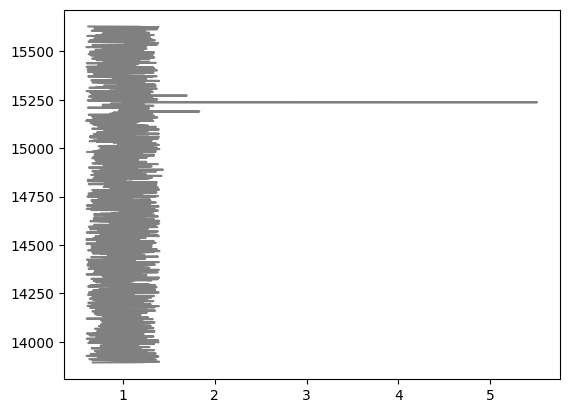

In [162]:
# Grafique aquí

plt.plot(data0["obs_1"], data0["Wlth"], color = "grey")

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Seguramente hay muchas maneras de centrar el grafico, pero a lo que llegue yo fue: Primero, crear un nuevo DataFrame, que contenga solo las potencias de las observaciones, para luego sacarle el promedio segun las columnas, de esta manera podemos despues redefinir el nuevo DataFrame restandole el promedio. Finalmente podemos graficar la nueva observacion 1 (con el promedio del ruido restado) vs las longitudes de onda, lo que efectivamente centra el grafico en 0.

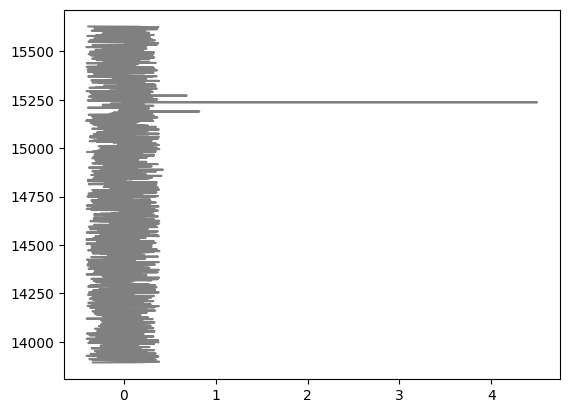

In [161]:
# Grafique el espectro centrado en 0 aquí
# Primero creamos el nuevo DataFrame con solo las observaciones, bajo el nombre data0_deluxe para luego sacarle el promedio

data0_deluxe = data0.drop(columns = ["Unnamed: 0", "Wlth"])
promedio = data0_deluxe.mean()

# Ahora podemos redefinir el nuevo DataFrame, restando el promedio...

data0_deluxe = data0_deluxe - promedio

# Finalmente, como nos preguntan por la observacion 1, graficamos la nueva observacion 1 (que tiene el promedio del ruido restado) con las longitudes de onda:

plt.plot(data0_deluxe["obs_1"], data0["Wlth"], color = "grey")

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [145]:
# Para hacer esto, usamos los metodos ya usados de pandas para promedio y std,
# para lo del margen supongo que se refiere a eliminar los que estan fuera del
# margen, lo que puede ser problematico despues para graficar y tal pero por
# ahora voy a aplicar eso nomas (con el filtro de datos de pandas).

# Entonces, definimos ruido como dice la instruccion y luego lo redefinimos segun el margen con los metodos de filtrar datos de pandas:

ruido = data0["obs_1"]
ruido = ruido[(ruido) >= ruido.mean() - 3*ruido.std()]
ruido = ruido[(ruido) <= ruido.mean() + 3*ruido.std()]
ruido

# notar que ahora tiene 2 filas menos :0

,obs_1
0,0.673065
1,1.218438
2,1.244496
3,1.395414
4,1.013531
...,...
1415,0.693123
1416,1.387281
1417,1.208096
1418,1.167845


2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

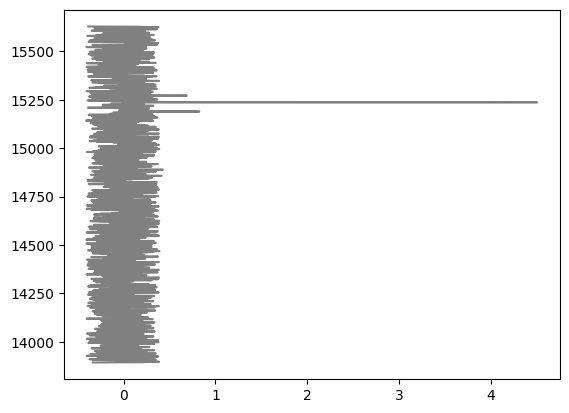

In [178]:
# Grafique el espectro centrado en 0 aquí
# Hacemos lo que nos dice la instruccion (para hacerla mas facil definimos nueva variable para graficar):

obs_1Centrado = data0["obs_1"] - ruido.mean()
plt.plot(obs_1Centrado, data0["Wlth"], color = "grey")

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:** despues de probar valores de $n$, es evidente que el mejor es $n$ = 2, pues $n$ = 1 deja ruido afuera de las lineas y $n$ = 3 es innecesariamente amplio. Mientras que $n$ = 2 abarca todo el ruido sin ser innecesariamente amplio.

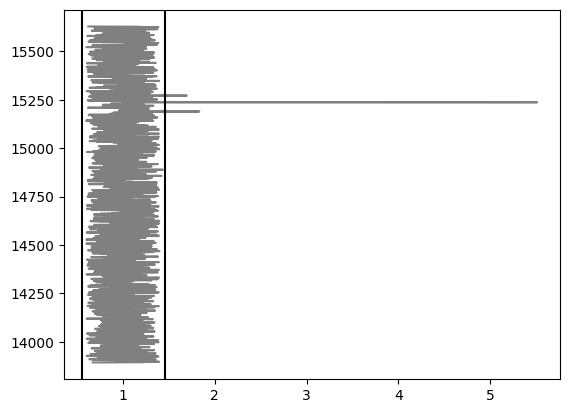

In [158]:
# Primero calculamos std del ruido:
std_ruido = ruido.std()

# Ahora graficamos el espectro y buscamos el valor para n (supongo que hubo un error de enunciado porque no le veo mucho sentido a hacer lineas horizontales):
# Aplicamos el plot de antes y graficamos lineas verticales con plt.axvline, para despues ir viendo distintos valores de n:

plt.plot(data0["obs_1"], data0["Wlth"], color = "grey")
plt.axvline(x = ruido.mean() - 2*std_ruido, color = "black")
plt.axvline(x = ruido.mean() + 2*std_ruido, color = "black")

# n = 2 es el indicado !!!

### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [181]:
# Podemos hacer un copypaste tal cual y aplicar f strings para poder hacer correr el for para todas las columnas:

for i in range(1, 21):
  ruido = data0[f"obs_{i}"]
  ruido = ruido[(ruido) >= ruido.mean() - 3*ruido.std()]
  ruido = ruido[(ruido) <= ruido.mean() + 3*ruido.std()]
  data0[f"obs_{i}"] = data0[f"obs_{i}"] - ruido.mean()

data0

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,-0.334837,0.048739,0.133701,0.362853,0.201410,-0.223720,-0.217798,-0.285839,...,-0.155063,-0.161301,-0.041081,-0.098143,-0.267710,-0.110412,-0.229588,0.213125,-0.052771,-0.284948
1,1,13894.381791,0.210536,0.384755,-0.354463,0.283881,0.219970,0.294341,0.294168,-0.030236,...,-0.214035,-0.196423,0.109355,0.236468,-0.246610,-0.064916,0.025866,0.120696,0.389733,-0.204204
2,2,13895.604780,0.236594,-0.224127,0.210778,-0.104288,0.199370,0.129416,0.138232,-0.364276,...,0.214896,0.092456,-0.134420,0.237607,-0.073721,-0.049146,0.281783,-0.384137,0.125374,0.004951
3,3,13896.827769,0.387512,-0.147004,-0.072299,-0.385685,0.097323,0.362443,-0.184435,-0.107535,...,-0.159208,0.210652,0.190932,0.055096,-0.273209,0.231390,0.374388,-0.223269,-0.194508,-0.283408
4,4,13898.050759,0.005629,-0.108552,0.123400,0.351261,-0.322103,-0.032836,-0.364873,0.290442,...,-0.394844,-0.282750,-0.309487,0.029362,0.158728,0.082569,0.393471,-0.209000,-0.128977,-0.294620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,-0.314779,0.222278,0.247164,0.103127,0.370664,-0.221073,0.099183,0.052125,...,0.343675,-0.228679,0.391967,-0.364783,-0.303944,-0.183150,-0.180568,0.078666,-0.352263,-0.101966
1416,1416,15624.911694,0.379379,0.332789,0.148880,0.251925,0.327237,-0.021668,-0.113744,0.200203,...,0.170877,-0.278099,0.092207,-0.162676,0.311879,0.169090,0.281288,-0.052506,-0.178051,0.366430
1417,1417,15626.134683,0.200194,-0.085328,-0.127833,0.081110,0.348949,-0.394537,-0.337372,0.045863,...,-0.350369,-0.019294,-0.008765,0.230524,-0.032143,0.307356,0.179316,-0.167737,0.376817,0.149503
1418,1418,15627.357673,0.159943,0.261171,0.304269,-0.057055,0.115973,-0.108359,0.310380,-0.390692,...,-0.179807,-0.369570,0.301771,-0.013142,-0.234453,0.172129,-0.102305,0.355191,-0.251594,0.001100


2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [207]:
# NO HAY TIEMPO ASI QUE LO VOYA HACER A LA ANTIGUA NOMAS!!
# explicacion: sacamos el promedio pedido para cada sigma (con axis=1 para que sea entre filas) y de ahi le ponemos std() para sacar la desviacion estandar en cada caso

sigma1 = data0["obs_1"].std()
sigma2 = data0[["obs_1","obs_2"]].mean(axis=1).std()
sigma3 = data0[["obs_1","obs_2","obs_3"]].mean(axis=1).std()
sigma4 = data0[["obs_1","obs_2","obs_3","obs_4"]].mean(axis=1).std()
sigma5 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5"]].mean(axis=1).std()
sigma6 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6"]].mean(axis=1).std()
sigma7 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7"]].mean(axis=1).std()
sigma8 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8"]].mean(axis=1).std()
sigma9 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9"]].mean(axis=1).std()
sigma10 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10"]].mean(axis=1).std()
sigma11 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11"]].mean(axis=1).std()
sigma12 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11","obs_12"]].mean(axis=1).std()
sigma13 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11","obs_12","obs_13"]].mean(axis=1).std
sigma14 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11","obs_12","obs_13","obs_14"]].mean(axis=1).std
sigma15 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11","obs_12","obs_13","obs_14","obs_15"]].mean(axis=1).std
sigma16 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11","obs_12","obs_13","obs_14","obs_15","obs_16"]].mean(axis=1).std()
sigma17 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11","obs_12","obs_13","obs_14","obs_15","obs_16","obs_17"]].mean(axis=1).std()
sigma18 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11","obs_12","obs_13","obs_14","obs_15","obs_16","obs_17","obs_18"]].mean(axis=1).std()
sigma19 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11","obs_12","obs_13","obs_14","obs_15","obs_16","obs_17","obs_18","obs_19"]].mean(axis=1).std()
sigma20 = data0[["obs_1","obs_2","obs_3","obs_4","obs_5","obs_6","obs_7","obs_8","obs_9","obs_10","obs_11","obs_12","obs_13","obs_14","obs_15","obs_16","obs_17","obs_18","obs_19","obs_20"]].mean(axis=1).std()

# Aca ocupamos el data0_deluxe de hace un rato para calcular el promedio de todas las potencias y asi añadir obs_all a data0

data0["obs_all"] = data0_deluxe.mean(axis=1)

data0

0.25549698527356973


 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:**

In [210]:

sigma = [float(sigma1), float(sigma2), float(sigma3), float(sigma4), float(sigma5), float(sigma6), float(sigma7), float(sigma8), float(sigma9), float(sigma10), float(sigma11), float(sigma12), float(sigma13), float(sigma14), float(sigma15), float(sigma16), float(sigma17), float(sigma18), float(sigma19), float(sigma20)]
plt.plot(np.arange(1,21), sigma)

TypeError: float() argument must be a string or a real number, not 'method'

### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:** Ahora se pueden observar claramente los dos peaks que antes apenas se podian ver (al principio se podian ver 3 peaks claros y 2 muy chicos), esta mejora en visibilidad de los peaks se debe al TLC (Teorema del Limite Central), que nos dice que "al promediar multiples observaciones, el ruido tiende a cancelarse".

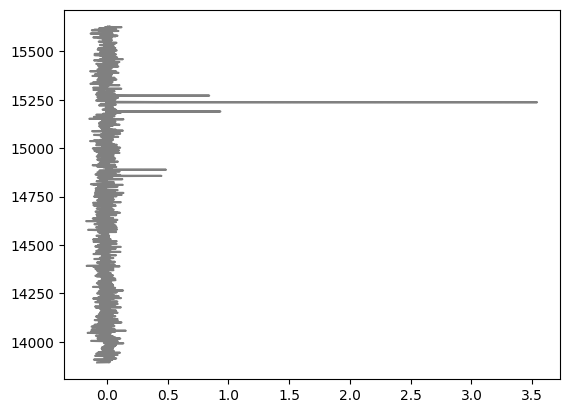

In [204]:
# Plotteamos lo que nos dicen:
plt.plot(data0["obs_all"], data0["Wlth"], color = "grey")